In [72]:
from switss.model import DTMC
import numpy as np
from switss.utils import color_from_hash

# example on how to retrieve SCCs from a DTMC
# setup the graph
# ----------------
E = [[0,1],[1,2],[2,0],[3,2],[3,1],[3,5],[4,2],[4,6],[5,4],[5,3],[6,4],[7,5],[7,6],[7,7]]
P = np.zeros(shape=(8,8))
for u,v in E:
    # initialize with arbitrary probabilities
    ucount = len([w for w,z in E if w == u])
    P[u,v] = 1/ucount
# ----------------

# create DTMC
dtmc = DTMC(P)

print("Transitions:")
print(dtmc.P)

Transitions:
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 1)	0.3333333333333333
  (3, 2)	0.3333333333333333
  (3, 5)	0.3333333333333333
  (4, 2)	0.5
  (4, 6)	0.5
  (5, 3)	0.5
  (5, 4)	0.5
  (6, 4)	1.0
  (7, 5)	0.3333333333333333
  (7, 6)	0.3333333333333333
  (7, 7)	0.3333333333333333


components: [5 5 5 2 4 1 3 0] proper Mecs: [0 0 0 0 0 1] MEC amount: 6


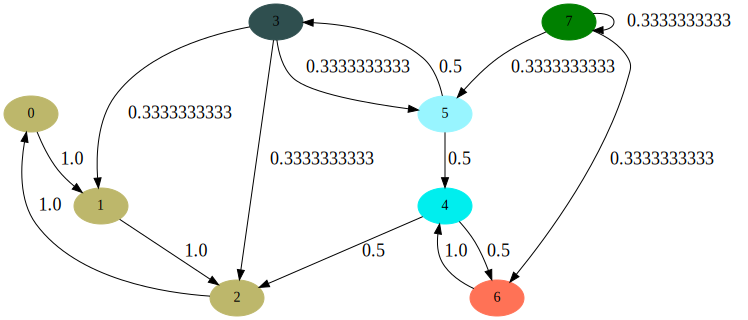

In [73]:
# using the example-DTMC above, we can retrieve its MECs.
# 0-entries identify states that are not part of any PROPER MEC.
components,proper_mecs,mec_counter = dtmc.maximal_end_components()
print("components:",components,"proper Mecs:", proper_mecs, "MEC amount:", mec_counter)

def sm(stateidx,labels):
    # give every state a green color that is not part of any MEC
    color = "green" if components[stateidx] == 0 else color_from_hash(7*components[stateidx])
    return { "color" : color, "style" : "filled" } 

dtmc.digraph(state_map=sm)

In [74]:
component_members = {}

for vertex, component in enumerate(components):
    if component not in component_members:
        component_members[component] = []
    component_members[component].append(vertex)

print(component_members)

mec_partition = list(component_members.values())

print(mec_partition)

{5: [0, 1, 2], 2: [3], 4: [4], 1: [5], 3: [6], 0: [7]}
[[0, 1, 2], [3], [4], [5], [6], [7]]


In [75]:
from switss.utils.graph_utils import underlying_graph

dtmc_graph = underlying_graph(dtmc.P)

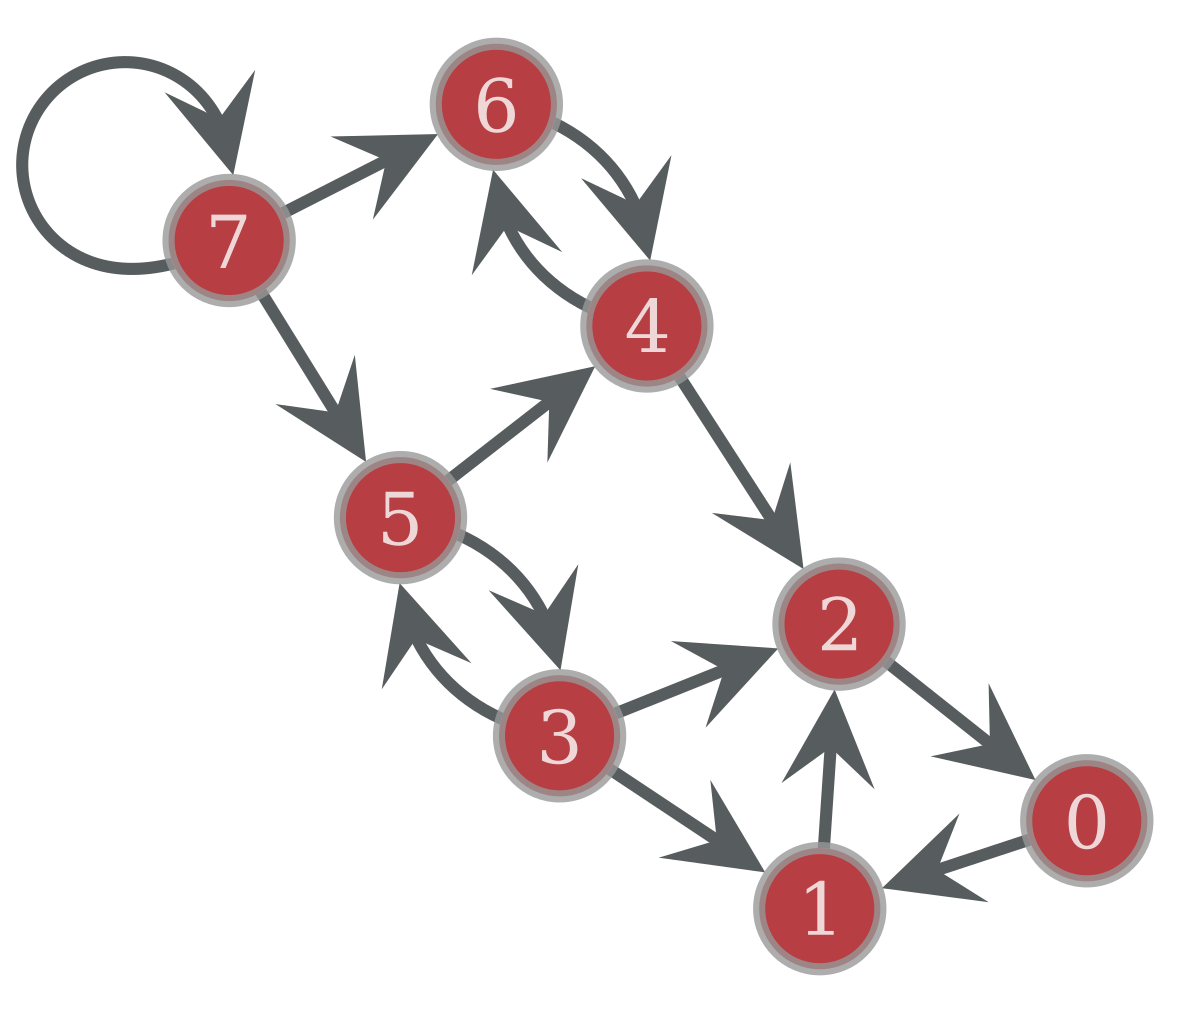

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f22795c5490, at 0x7f2279415a30>

In [76]:
import graph_tool.all as gt

gt.graph_draw(dtmc_graph, vertex_text=dtmc_graph.vertex_index)

In [77]:
from switss.utils.graph_utils import quotient

quotient_MEC_graph,_,_ = quotient(dtmc_graph, mec_partition)


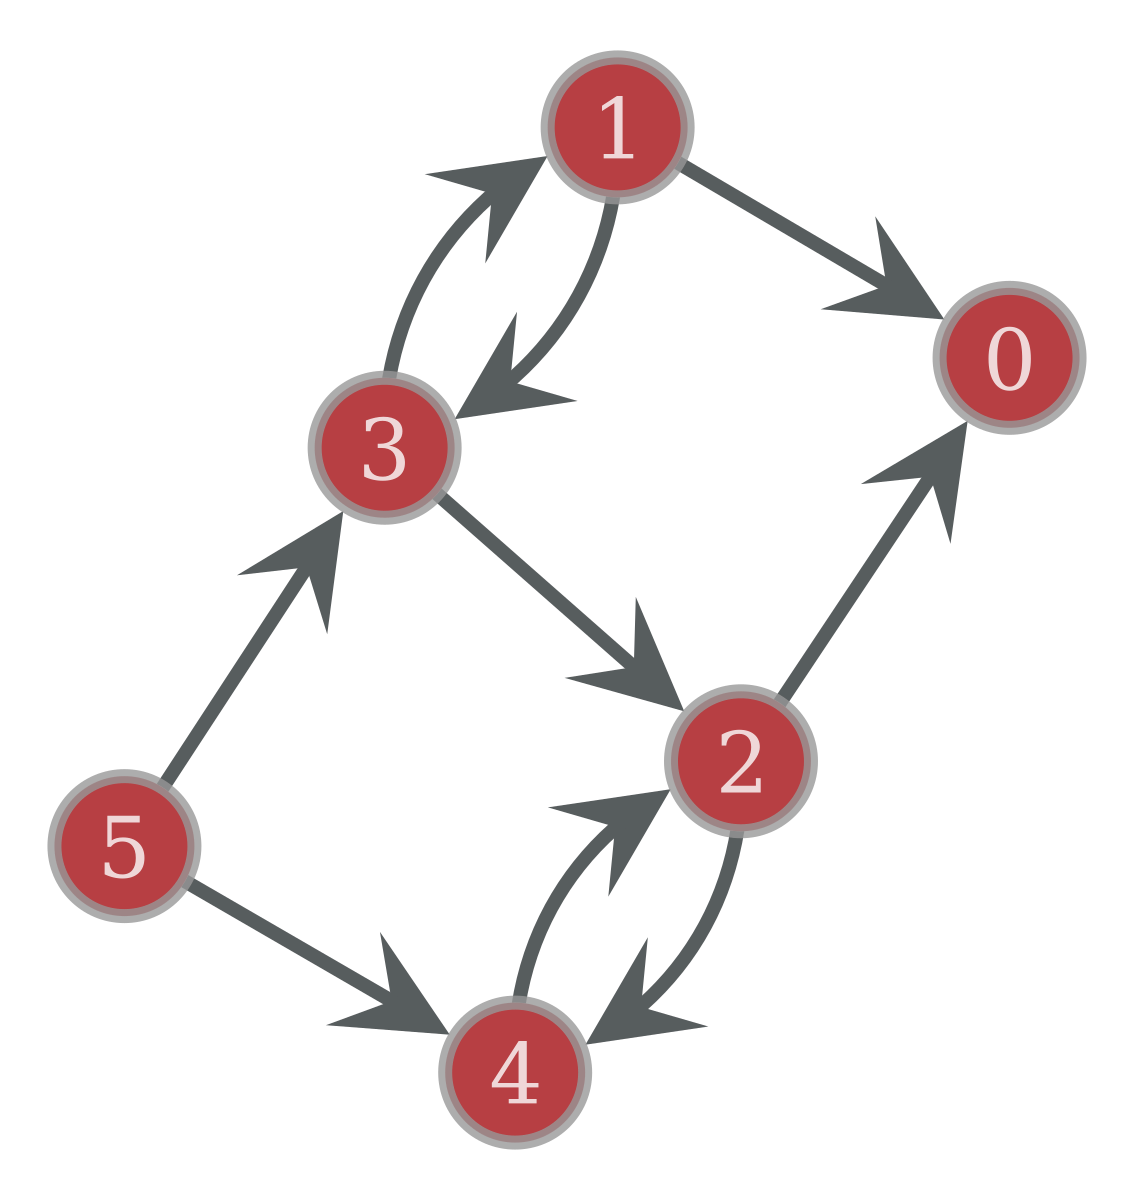

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f22795c74d0, at 0x7f2279414e30>

In [78]:
import graph_tool.all as gt

# for component, 

gt.graph_draw(quotient_MEC_graph, vertex_text=quotient_MEC_graph.vertex_index)

components: [4 4 4 1 3 1 2 0] proper Mecs: [1 1 0 0 1] MEC amount: 5


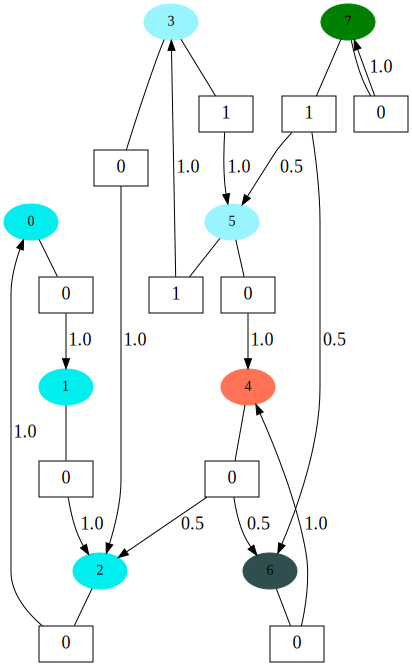

In [79]:
from switss.model import MDP
import numpy as np
from switss.utils import color_from_hash

# example on how to retrieve SCCs from a MDP
# setup the graph
# ----------------
SAPpairs = [(0,0,1,1),(1,0,2,1),(2,0,0,1),(3,0,2,1),(4,0,2,0.5),(3,1,5,1),(5,1,3,1),(5,0,4,1),(4,0,6,0.5),(6,0,4,1),(7,1,6,0.5),(7,1,5,0.5),(7,0,7,1)]
index_by_state_action = {(0,0):0,(1,0):1,(2,0):2,(3,0):3,(4,0):4,(3,1):5,(5,1):6,(5,0):7,(6,0):8,(7,1):9,(7,0):10}
P = np.zeros(shape=(11,8))
for s,a,d,p in SAPpairs:
    P[index_by_state_action[(s,a)],d] = p
# ----------------

# retrieve SCCs
mdp = MDP(P,index_by_state_action)

components,proper_mecs,mec_counter = mdp.maximal_end_components()
print("components:",components,"proper Mecs:", proper_mecs, "MEC amount:", mec_counter)

def sm(stateidx,labels):
    # give every state a green color that is not part of any MEC
    color = "green" if components[stateidx] == 0 else color_from_hash(7*components[stateidx])
    return { "color" : color, "style" : "filled" } 

mdp.digraph(state_map=sm)
